In [1]:
import pandas as pd
import numpy as np
import jieba
import re
import warnings
from sklearn import preprocessing
from sklearn import metrics
warnings.filterwarnings('ignore')

# 1. 数据预处理

## 1.1 文本预处理

In [2]:
# 读取停用词
stop_words = []
with open('stop_words.txt', 'r', encoding='gbk') as f:
    for line in f.readlines():
        stop_words.append(line.replace('\n', ''))
stop_words.append('↓')
# 除去英文词和特殊字符
special_words = "[a-zA-Z0-9\s+\.\!\/_,$%^*(+\"\']+|[+——！，。？、：；;《》“”~@#￥%……&*（）]+"

In [3]:
# 读取爬取数据
columns = ['topicId','title','content']
article_data = pd.read_csv('./article/articles.csv', names=columns, encoding='utf-8')
# 过滤掉字数小于200的文章，一般字数特别少的文章分析情感意义不是很大(情感方向不明确)
article_data = article_data[article_data['content'].apply(lambda x : len(x) >= 200)]
article_data = article_data.loc[0:100]

In [4]:
article_data.head()

,topicId,title,content
0,19550429,"""想要充实自己，有哪 10 本书或者 10 部电影值得推荐？""","""85K收藏，赞同才36K，你们这。。。。。。。。-声明，如果有微博或者公众号发表了我的这篇..."
1,19550429,"""印象中什么时候你对中国电影、电视剧最失望？""","""当我得知王莎莎没通过北电，并且无戏可拍时。王莎莎就是小兵张嘎里的英子武林外传里的莫小贝后来..."
2,19550429,"""有哪些好看的高智商悬疑电影？""","""所谓高智商悬疑电影，可分为两部分来解析:悬疑电影悬疑电影，即是悬疑片，以完整故事为内核，设..."
3,19550429,"""谁是 2016 年的演技最差的男星？""","""首先，李易峰，你们黑不起。想当年，听说李易峰得了百花奖，我强烈的感觉到中国电影药丸，，，不..."
4,19550429,"""《不能说的秘密》是部好电影吗？""","""怒答！看了前排几个，感觉很不过瘾。大都没说到点子上。这么一部牛X的电影，能是几句话就概括的..."


In [5]:
content_data = article_data.content.values

In [6]:
len(content_data), len(article_data)

(90, 90)

In [7]:
# 除去文本中的停用词、数字和特殊字符 
def get_rid_of_words(content):
    words = []
    content = re.sub(special_words, '', content)
    words_list = jieba.cut(content, cut_all=False)
    for word in words_list:
        if word in stop_words:
            pass
        else:
            words.append(word)
            
    return words

# 分词，除去停用、数据。特殊字符
# text = []
# for content in content_data:
#     text.append(get_rid_of_words(content))

## 1.2 读入标注数据

In [8]:
# 读入人工标注数据
columns = ['title', 'target']
# target = pd.read_csv('./article/target.csv', encoding='gbk', index_col=False, dtype={'target' : int})
target = pd.read_csv('./article/target.csv', encoding='gbk', index_col=False)
target.head()

,Unnamed: 0,title,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,target
0,0,"""想要充实自己，有哪 10 本书或者 10 部电影值得推荐？""",NaN,NaN,NaN,NaN,NaN,0.0
1,1,"""印象中什么时候你对中国电影、电视剧最失望？""",NaN,NaN,NaN,NaN,NaN,-1.0
2,2,"""有哪些好看的高智商悬疑电影？""",NaN,NaN,NaN,NaN,NaN,1.0
3,3,"""谁是 2016 年的演技最差的男星？""",NaN,NaN,NaN,NaN,NaN,-1.0
4,4,"""《不能说的秘密》是部好电影吗？""",NaN,NaN,NaN,NaN,NaN,1.0


In [9]:
target.drop(['Unnamed: 0', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6'], axis=1, inplace=True)
target = target[0:90]
# 更正数据类型，并且0代表消极，1代表中性， 2代表积极
target['target'] = target['target'].astype(int).values
target['target'] = target['target'] + 1

In [10]:
target.head()

,title,target
0,"""想要充实自己，有哪 10 本书或者 10 部电影值得推荐？""",1
1,"""印象中什么时候你对中国电影、电视剧最失望？""",0
2,"""有哪些好看的高智商悬疑电影？""",2
3,"""谁是 2016 年的演技最差的男星？""",0
4,"""《不能说的秘密》是部好电影吗？""",2


In [11]:
# 验证一下标题是否对齐
(target.title.values == article_data.loc[0:100].title.values)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

# 2. 朴素贝叶斯

In [12]:
# 训练分类器
def Train_NB(article_data, target):
    # 存放训练集的词汇表
    V = set()
    # 存放先验概率
    label_prob = np.zeros((3,))
    # 存放不同类别下的总的词数
    article_words_occurance = np.zeros((3,))
    # 下面这个列表存放消极，中性，积极类别下的词频，里面存储的是这三个类别的字典
    sentiment_dict = []
    for label in range(0, 3):
        label_dict = {}
        
        # 索引出里面类别为label的文章
        articles = article_data[(target['target'] == label).values]
        
        # 计算先验概率
        label_prob[label] = np.log(len(articles) / len(article_data))
        
        # 分词，除去停用、数据。特殊字符
        contents = articles.content.values
        for content in contents:
            words = get_rid_of_words(content)
            article_words_occurance[label] += len(words)
            for word in words:
                V.add(word)
                try:
                    label_dict[word] += 1
                except:
                    label_dict[word] = 1
        
        sentiment_dict.append(label_dict)

    # 存放词的似然概率，一样里面由3个字典构成
    words_pro_dict = []
    # 计算似然项
    for label in range(0, 3):
        words_pro = {}
        for word in V:
            try:
                words_pro[word] = np.log((sentiment_dict[label][word]+1) / (article_words_occurance[label]+len(sentiment_dict[label]))) 
            except:
                words_pro[word] = np.log(1 / (article_words_occurance[label]+len(sentiment_dict[label])))
        words_pro_dict.append(words_pro)
        
    return label_prob, words_pro_dict, V

In [13]:
label_prob, words_pro_dict, V = Train_NB(article_data, target)

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 1.121 seconds.
Prefix dict has been built succesfully.


In [14]:
# 预测一次文件的
def Predict_NB(test_doc, label_prob, words_pro_dict, V):
    # 先进行预处理工作
    words = get_rid_of_words(test_doc)
    # 初始化概率
    prob = label_prob.copy()
    for label in range(0, 3):
        for word in words:
            if word in V:
                prob[label] += words_pro_dict[label][word]
            else:
                pass
    return prob.argmax(), prob

In [15]:
def get_accuracy(test_docs, y, label_prob, words_pro_dict, V):
    y_hat = np.zeros((len(y),))
    y_hat_prob = np.zeros((len(y), 3))
    for i in range(len(y)):
        # 概率是用来计算AUC
        y_hat[i], y_hat_prob[i] = Predict_NB(test_docs[i], label_prob, words_pro_dict, V)
    
    y = np.array(y[:])
    acc = (y_hat == y).sum() / len(y)
    
    return acc, y_hat, y_hat_prob

In [16]:
acc, y_hat, y_hat_prob = get_accuracy(content_data, target.target.values, label_prob, words_pro_dict, V)

In [17]:
# 画出三个类的ROC曲线
y_hat_normal_pro = -y_hat_prob / -(y_hat_prob.sum(axis=1).reshape(len(y_hat_prob), 1))
one_hot = preprocessing.OneHotEncoder()
y_one_hot = one_hot.fit_transform(np.array(target.target.values).reshape(-1, 1)).toarray()
y_hat_one_hot = one_hot.transform(np.array(y_hat).reshape(-1, 1)).toarray()
fpr, tpr, thresholds = metrics.roc_curve(y_one_hot.ravel(), y_hat_normal_pro.ravel())

In [18]:
# 画出消极或者不消极的ROC曲线
binary_y = np.ones((len(target.target.values), 2))
binary_y[:, 0] = y_one_hot[:, 0]
binary_y_hat = np.ones((len(target.target.values), 2))
binary_y_hat[:, 0] = y_hat_one_hot[:, 0]
fpr, tpr, thresholds = metrics.roc_curve(binary_y.ravel(), binary_y_hat.ravel())

In [19]:
# metrics.roc_auc_score(y_one_hot, y_hat_normal_pro, average='micro')

In [21]:
auc = metrics.auc(fpr, tpr)

**TPR指正类预测对了多少，FPR指负类预测错了多少**  
第一个点，(0,1)，即FPR=0, TPR=1，这意味着FN（false negative）=0，并且FP（false positive）=0。Wow，这是一个完美的分类器，它将所有的样本都正确分类。第二个点，(1,0)，即FPR=1，TPR=0，类似地分析可以发现这是一个最糟糕的分类器，因为它成功避开了所有的正确答案。第三个点，(0,0)，即FPR=TPR=0，即FP（false positive）=TP（true positive）=0，可以发现该分类器预测所有的样本都为负样本（negative）。类似的，第四个点（1,1），分类器实际上预测所有的样本都为正样本。经过以上的分析，我们可以断言，ROC曲线越接近左上角，该分类器的性能越好  
(0, 0)和(1, 1)是当我们将threshold设置为1和0时得到的值

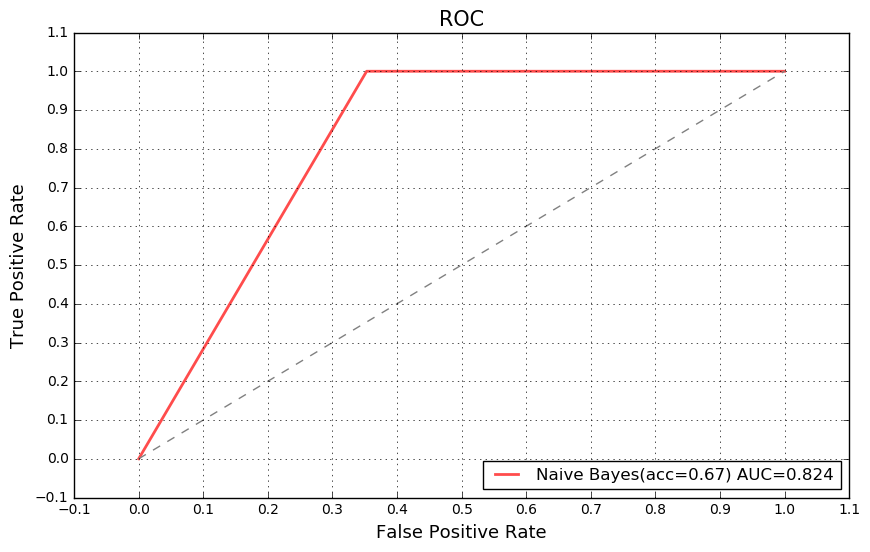

In [22]:
import  matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, c = 'r', lw = 2, alpha = 0.7, label = u'Naive Bayes(acc=%.2f) AUC=%.3f' % (acc, auc))
plt.plot((0, 1), (0, 1), c = '#808080', lw = 1, ls='--')
plt.xlim((-0.1, 1.1))
plt.ylim((-0.1, 1.1))

plt.legend(loc='lower right')
plt.xticks(np.arange(-0.1, 1.1, 0.1))
plt.yticks(np.arange(-0.1, 1.1, 0.1))

plt.grid(b=True, ls=':')

plt.title('ROC', fontsize=15)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)
plt.show()

# 为什么使用ROC曲线
既然已经这么多评价标准，为什么还要使用ROC和AUC呢？因为ROC曲线有个很好的特性：**一方面即便测试集类别不平衡，也能很好的反应模型的性能**，另一方面当测试集中的正负样本的分布变化的时候，ROC曲线能够保持不变。在实际的数据集中经常会出现类不平衡（class imbalance）现象，即负样本比正样本多很多（或者相反），而且测试数据中的正负样本的分布也可能随着时间变化。  

In [22]:
# 混淆矩阵
metrics.confusion_matrix(target.target.values, y_hat)

array([[22,  0,  0],
       [24,  7,  6],
       [ 0,  0, 31]])

In [23]:
print(metrics.classification_report(target.target.values, y_hat))

              precision    recall  f1-score   support

           0       0.48      1.00      0.65        22
           1       1.00      0.19      0.32        37
           2       0.84      1.00      0.91        31

   micro avg       0.67      0.67      0.67        90
   macro avg       0.77      0.73      0.63        90
weighted avg       0.82      0.67      0.60        90



In [24]:
import itertools
def outputConfusionMatrix(labels, pred):
    """ Generate a confusion matrix """
    cm = metrics.confusion_matrix(labels, pred, labels=range(3))
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Reds)
    plt.colorbar()
    classes = ["neg", "neut", "pos"]
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    # 将数字显示到热度图上，x是列，y是行
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

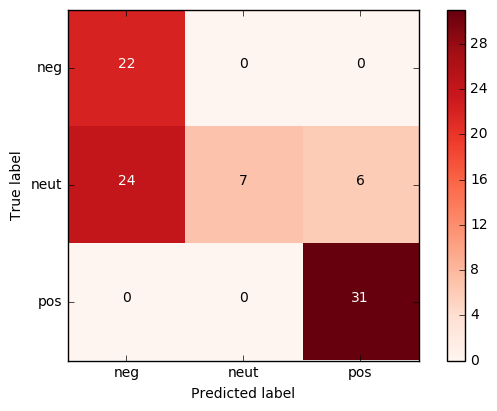

In [25]:
outputConfusionMatrix(target.target.values, y_hat)

In [26]:
import seaborn as sns

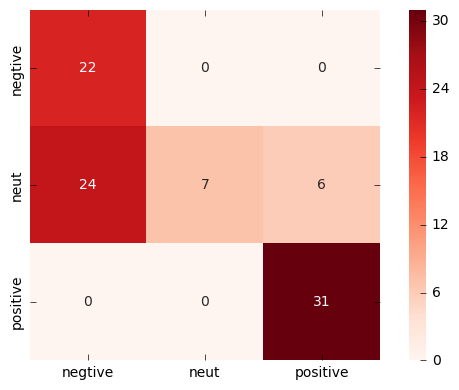

In [27]:
sns.heatmap(metrics.confusion_matrix(target.target.values, y_hat), xticklabels=['negtive', 'neut', 'positive'],
            yticklabels=['negtive', 'neut', 'positive'],
            cmap=plt.cm.Reds, cbar=True, annot=True, fmt="d", square=True)
plt.tight_layout()
plt.show()